In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
import torch
import os
import networkx as nx

In [2]:
co_dir = "../results/2021-09-07_21-01_dist_mnist_complete"
cy_dir = "../results/2021-09-05_14-27_dist_mnist_v3"
r3_dir = "../results/2021-09-07_20-11_dist_mnist_random3"
r8_dir = "../results/2021-09-07_19-01_dist_mnist_random8"
solo_dir  = "../results/2021-09-04_16-01_dist_mnist_v3"

co_cadmm = torch.load(os.path.join(co_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
co_dsgt = torch.load(os.path.join(co_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
co_dsgd = torch.load(os.path.join(co_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))

cy_cadmm = torch.load(os.path.join(cy_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
cy_dsgt = torch.load(os.path.join(cy_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
cy_dsgd = torch.load(os.path.join(cy_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))

r3_cadmm = torch.load(os.path.join(r3_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
r3_dsgt = torch.load(os.path.join(r3_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
r3_dsgd = torch.load(os.path.join(r3_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))

r8_cadmm = torch.load(os.path.join(r8_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
r8_dsgt = torch.load(os.path.join(r8_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
r8_dsgd = torch.load(os.path.join(r8_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))

results_solo = torch.load(os.path.join(solo_dir, "solo_results.pt"), map_location=torch.device("cpu"))

In [3]:
co_G = nx.read_gpickle(os.path.join(co_dir, "graph.gpickle"))
co_fied = nx.linalg.algebraicconnectivity.algebraic_connectivity(co_G)
cy_G = nx.read_gpickle(os.path.join(cy_dir, "graph.gpickle"))
cy_fied = nx.linalg.algebraicconnectivity.algebraic_connectivity(cy_G)
r3_G = nx.read_gpickle(os.path.join(r3_dir, "graph.gpickle"))
r3_fied = nx.linalg.algebraicconnectivity.algebraic_connectivity(r3_G)
r8_G = nx.read_gpickle(os.path.join(r8_dir, "graph.gpickle"))
r8_fied = nx.linalg.algebraicconnectivity.algebraic_connectivity(r8_G)

In [4]:
def plot_vals(ax, aca, acb, acc, results_solo, title):
    t = torch.arange(aca.shape[0]) * 20
    cent_acc = 0.985
    ax.plot(t, cent_acc * torch.ones_like(t), c=cent_color,
        linewidth=2, linestyle=":", label="Centralized")
    
    for i in range(9):
        ax.plot(t, results_solo[i]["validation_accuracy"] * np.ones_like(t),
            linewidth=2, color=solo_color, linestyle=":")
    ax.plot(t, results_solo[9]["validation_accuracy"] * np.ones_like(t),
        linewidth=2, color=solo_color, label="Individual", linestyle=":")
    
    ax.plot(t, torch.mean(aca, dim=1), c=cadmm_color, linewidth=2, label="DiNNO")
    ax.fill_between(t, torch.amax(aca, dim=1), torch.amin(aca, dim=1),
        color=cadmm_color, alpha=0.5, zorder=3)
    
    ax.plot(t, torch.mean(acb, dim=1), c=dsgt_color, linewidth=2, label="DSGT")
    ax.fill_between(t, torch.amax(acb, dim=1), torch.amin(acb, dim=1),
        color=dsgt_color, alpha=0.5, zorder=2)
    
    ax.plot(t, torch.mean(acc, dim=1), c=dsgd_color, linewidth=2, label="DSGD")
    ax.fill_between(t, torch.amax(acc, dim=1), torch.amin(acc, dim=1),
        color=dsgd_color, alpha=0.5, zorder=1)
    
    ax.set_ylim((0.0, 1.0))
    ax.set_title(title)
    ax.set_xlabel("Communication Round")
    ax.grid(zorder=0)

    

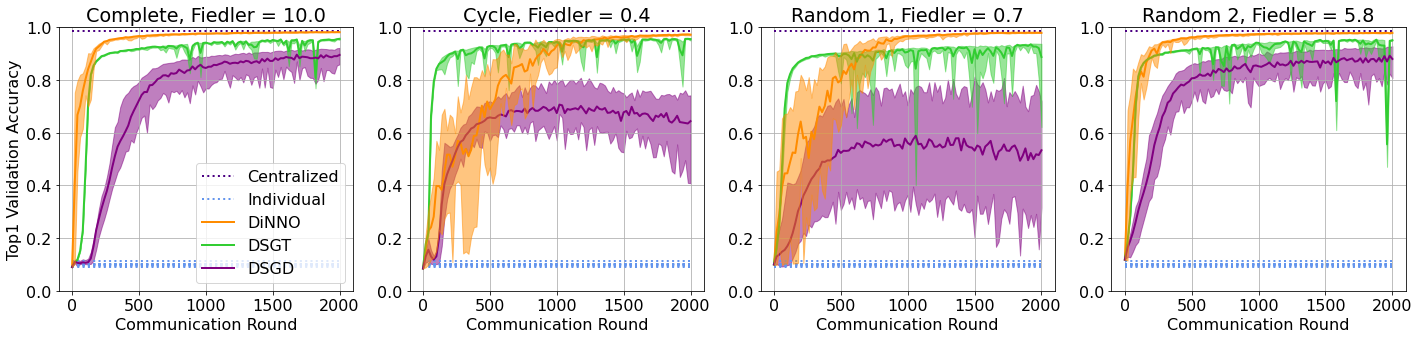

In [5]:
cadmm_color="darkorange"
dsgt_color="limegreen"
dsgd_color="purple"
cent_color="indigo"
solo_color="cornflowerblue"

(fig, axs) = plt.subplots(ncols=4, figsize=(20, 5), tight_layout=True)

co_aca = torch.stack(co_cadmm["top1_accuracy"]) 
co_acb = torch.stack(co_dsgt["top1_accuracy"]) 
co_acc = torch.stack(co_dsgd["top1_accuracy"]) 

cy_aca = torch.stack(cy_cadmm["top1_accuracy"]) 
cy_acb = torch.stack(cy_dsgt["top1_accuracy"]) 
cy_acc = torch.stack(cy_dsgd["top1_accuracy"]) 

r3_aca = torch.stack(r3_cadmm["top1_accuracy"]) 
r3_acb = torch.stack(r3_dsgt["top1_accuracy"]) 
r3_acc = torch.stack(r3_dsgd["top1_accuracy"]) 

r8_aca = torch.stack(r8_cadmm["top1_accuracy"]) 
r8_acb = torch.stack(r8_dsgt["top1_accuracy"]) 
r8_acc = torch.stack(r8_dsgd["top1_accuracy"]) 

title = "Complete, Fiedler = {:.1f}".format(co_fied)
plot_vals(axs[0], co_aca, co_acb, co_acc, results_solo, title)
axs[0].set_ylabel("Top1 Validation Accuracy")
axs[0].legend(loc=4)

title = "Cycle, Fiedler = {:.1f}".format(cy_fied)
plot_vals(axs[1], cy_aca, cy_acb, cy_acc, results_solo, title)

title = "Random 1, Fiedler = {:.1f}".format(r3_fied)
plot_vals(axs[2], r3_aca, r3_acb, r3_acc, results_solo, title)

title = "Random 2, Fiedler = {:.1f}".format(r8_fied)
plot_vals(axs[3], r8_aca, r8_acb, r8_acc, results_solo, title)

fig.savefig("mnist_four.png", dpi=1000)

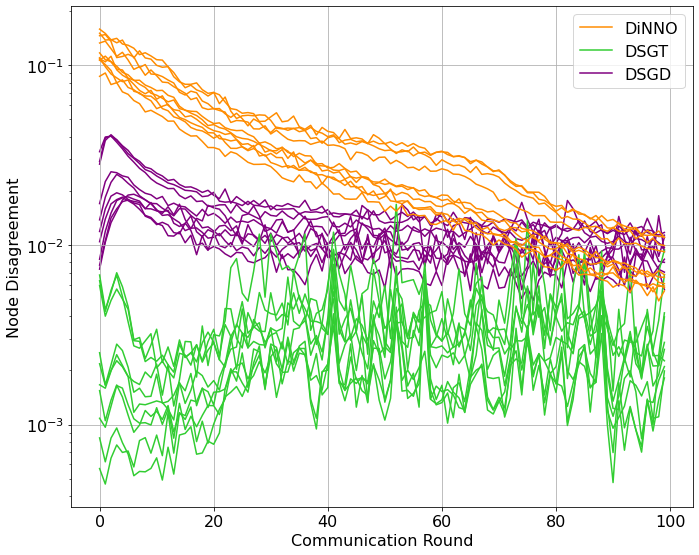

In [6]:
ag_cadmm = torch.vstack([v[1].reshape(1, -1) for v in r3_cadmm["consensus_error"]])
ag_dsgt = torch.vstack([v[1].reshape(1, -1) for v in r3_dsgt["consensus_error"]])
ag_dsgd = torch.vstack([v[1].reshape(1, -1) for v in r3_dsgd["consensus_error"]])


(fig, ax) = plt.subplots(figsize=(10, 8), tight_layout=True)
ax.plot(ag_cadmm[1:, :9], c=cadmm_color, zorder=3)
ax.plot(ag_cadmm[1:, 9], c=cadmm_color, label="DiNNO", zorder=3)

ax.plot(ag_dsgt[1:, :9], c=dsgt_color, zorder=2)
ax.plot(ag_dsgt[1:, 9], c=dsgt_color, label="DSGT", zorder=2)

ax.plot(ag_dsgd[1:, :9], c=dsgd_color, zorder=1)
ax.plot(ag_dsgd[1:, 9], c=dsgd_color, label="DSGD", zorder=1)

ax.set_yscale("log")
ax.grid()
ax.set_xlabel("Communication Round")
ax.set_ylabel("Node Disagreement")
ax.legend(loc=1)
fig.savefig("mnist_agree.svg")